In [3]:
import nufit as nu
import numpy as np
import matplotlib.pyplot as plt

Function ``make_LambdaCDM_Pk``. Input
- file name: creates a file ``filename.npz``

In [4]:
nu.make_LambdaCDM_Pk("LambdaCDM")

In [5]:
LambdaCDM = np.load("LambdaCDM.npz", allow_pickle=True)

In [6]:
LambdaCDM.files

['results_dictionary', 'k_array', 'Pk_LambdaCDM']

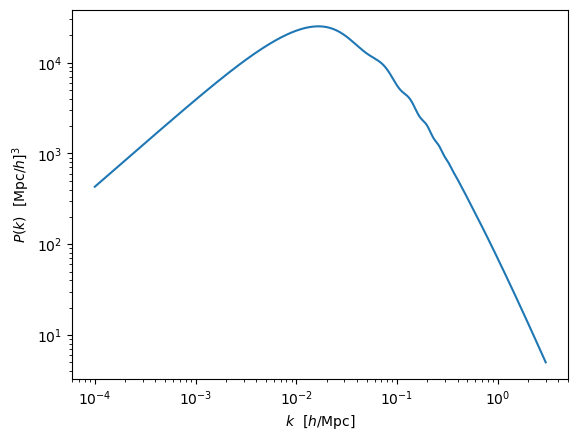

In [7]:
plt.figure()
plt.loglog(LambdaCDM['k_array'], LambdaCDM['Pk_LambdaCDM'])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.show()

In [8]:
LambdaCDM['results_dictionary'].item()

{'age': 13.770597734385982,
 'Neff': 3.0440000000000005,
 'omega_b': 0.0223828,
 'Omega0_cdm': 0.26120569320189113,
 'h': 0.6781,
 'Omega0_k': 0.0,
 'Omega0_m': 0.30988304299999997,
 'Omega_b': 0.048677349798108865,
 'Omega_g': 5.378150968509925e-05,
 'Omega_lambda': 0.6900259955434282,
 'Omega_m': 0.30988304299999997,
 'Omega_r': 9.096145657179167e-05,
 'rs_drag': 147.0716138462091,
 'Sigma8': 0.8250066476522795,
 'Sigma8_cb': 0.8250066476522795,
 'T_cmb': 2.7255,
 'theta_s_100': 1.041798088420396,
 'theta_star_100': 1.0441456300191327,
 'n_s': 0.9660499,
 'tau_reio': 0.05430842}

Function ``v_masses_std``. Inputs:
- smallest neutrino mass in eV
- Normal hierarchy? (True: normal, False: inverted)
- File name... save a file as ``filename.npz``

In [9]:
nu.v_masses_std(0.1, True, "100meV")

In [10]:
nures = np.load("100meV.npz", allow_pickle=True)

In [23]:
nures.files

['results_dictionary',
 'k_n_array',
 'Pk_n_array',
 'normal_hierarchy',
 'm1',
 'm2',
 'm3',
 'm_small',
 'sum_nu']

Text(0, 0.5, '$\\Delta P / P$')

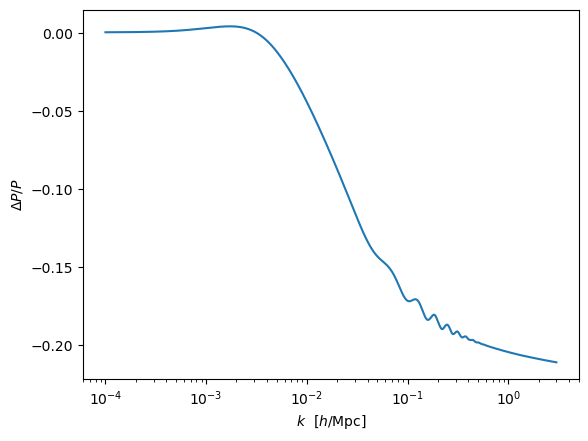

In [13]:
plt.figure()
plt.semilogx(nures['k_n_array'], (nures['Pk_n_array']-LambdaCDM['Pk_LambdaCDM'])/LambdaCDM['Pk_LambdaCDM'])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$\Delta P / P$')

In [14]:
print("sum m_nu = ", nures['sum_nu'], "eV")

sum m_nu =  0.3119847291432966 eV


In [15]:
nu.v_masses_std(0.45, True, "450meV")
nu_upper_lim = np.load("450meV.npz", allow_pickle=True)

Text(0.5, 1.0, 'Matter Power Spectrum Differences of Lambda-CDM with $M_ν$ = 450 meV and $M_ν$ = 0')

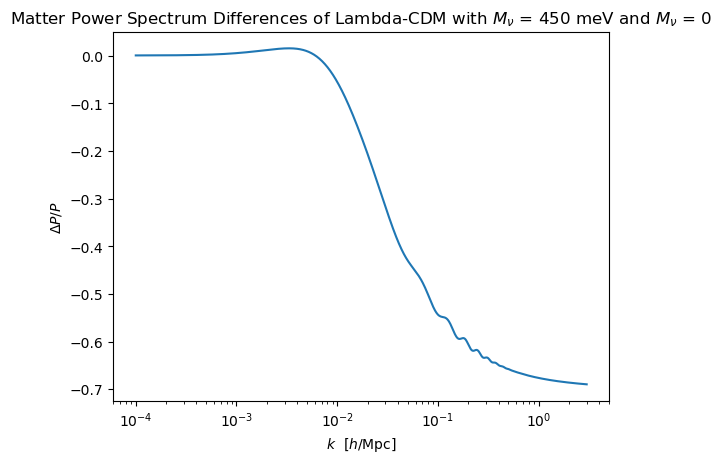

In [17]:
plt.figure()
plt.semilogx(nu_upper_lim['k_n_array'], (nu_upper_lim['Pk_n_array']-LambdaCDM['Pk_LambdaCDM'])/LambdaCDM['Pk_LambdaCDM'])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$\Delta P / P$')
plt.title('Matter Power Spectrum Differences of Lambda-CDM with $M_ν$ = 450 meV and $M_ν$ = 0')

In [88]:
masses = np.linspace(0.05, 0.45, 20)
mass_arr1 = np.zeros(len(masses))
p_diff_arr1 = np.zeros(len(masses))

def mps_diff(mass_val, plot):
    name = f"{mass_val}meV"
    nu.v_masses_std(mass_val, True, name)
    nu_mass_val = np.load(f"{name}.npz", allow_pickle=True)

    if plot == True:
        plt.figure()
        plt.semilogx(nu_mass_val['k_n_array'], (nu_mass_val['Pk_n_array']-LambdaCDM['Pk_LambdaCDM'])/LambdaCDM['Pk_LambdaCDM'])
        plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
        plt.ylabel(r'$\Delta P / P$')
        plt.title(f"Matter Power Spectrum Differences of Lambda-CDM with $M_ν$ = {mass_val*1000} meV and $M_ν$ = 0")

    return nu_mass_val

In [89]:
for i in range(len(masses)):
    val = masses[i]
    file = mps_diff(val, False)

    mass_arr1[i] = file['sum_nu']
    p_diff_arr1[i] = ((file['Pk_n_array'][-1]-LambdaCDM['Pk_LambdaCDM'][-1])/LambdaCDM['Pk_LambdaCDM'][-1])


 -> non-cold dark matter species with i=1 has m_i = 3.022222e-01 eV (so m_i / omega_i =9.314312e+01 eV)
 -> ncdm species i=1 sampled with 11 (resp. 5) points for purpose of background (resp. perturbation) integration. In the relativistic limit it gives Delta N_eff = 1.0132
 -> non-cold dark matter species with i=2 has m_i = 3.023446e-01 eV (so m_i / omega_i =9.314312e+01 eV)
 -> ncdm species i=2 sampled with 11 (resp. 5) points for purpose of background (resp. perturbation) integration. In the relativistic limit it gives Delta N_eff = 1.0132
 -> non-cold dark matter species with i=3 has m_i = 3.062618e-01 eV (so m_i / omega_i =9.314313e+01 eV)
 -> ncdm species i=3 sampled with 11 (resp. 5) points for purpose of background (resp. perturbation) integration. In the relativistic limit it gives Delta N_eff = 1.0132
 -> age = 13.772737 Gyr
 -> conformal age = 14175.182476 Mpc
 -> N_eff = 3.044 (summed over all species that are non-relativistic at early times) 
 -> radiation/matter equality 

Text(0.5, 1.0, 'Smallest Neutrino Mass Range: 50 meV - 450 meV')

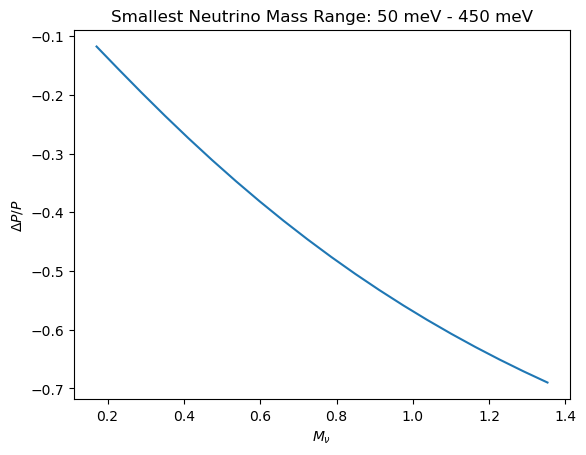

In [90]:
plt.figure()
plt.plot(mass_arr1, p_diff_arr1)
plt.xlabel('$M_ν$')
plt.ylabel(r'$\Delta P / P$')
plt.title('Smallest Neutrino Mass Range: 50 meV - 450 meV')

In [91]:
three_meV_masses = np.linspace(0.28, 0.32, 10)
mass_arr2 = np.zeros(len(three_meV_masses))
p_diff_arr2 = np.zeros(len(three_meV_masses))

for i in range(len(three_meV_masses)):
    val = three_meV_masses[i]
    file = mps_diff(val, False)
    
    mass_arr2[i] = file['sum_nu']
    p_diff_arr2[i] = ((file['Pk_n_array'][-1]-LambdaCDM['Pk_LambdaCDM'][-1])/LambdaCDM['Pk_LambdaCDM'][-1])

(resp. 5) points for purpose of background (resp. perturbation) integration. In the relativistic limit it gives Delta N_eff = 1.0132
 -> age = 13.772720 Gyr
 -> conformal age = 14173.356562 Mpc
 -> N_eff = 3.044 (summed over all species that are non-relativistic at early times) 
 -> radiation/matter equality at z = 3271.445384
    corresponding to conformal time = 117.562125 Mpc
Running CLASS version v3.3.0
Computing background
 -> non-cold dark matter species with i=1 has m_i = 2.605263e-01 eV (so m_i / omega_i =9.314306e+01 eV)
 -> ncdm species i=1 sampled with 11 (resp. 5) points for purpose of background (resp. perturbation) integration. In the relativistic limit it gives Delta N_eff = 1.0132
 -> non-cold dark matter species with i=2 has m_i = 2.606683e-01 eV (so m_i / omega_i =9.314306e+01 eV)
 -> ncdm species i=2 sampled with 11 (resp. 5) points for purpose of background (resp. perturbation) integration. In the relativistic limit it gives Delta N_eff = 1.0132
 -> non-cold dark ma

Text(0.5, 1.0, 'Smallest Neutrino Mass Range: 280 meV - 320 meV')

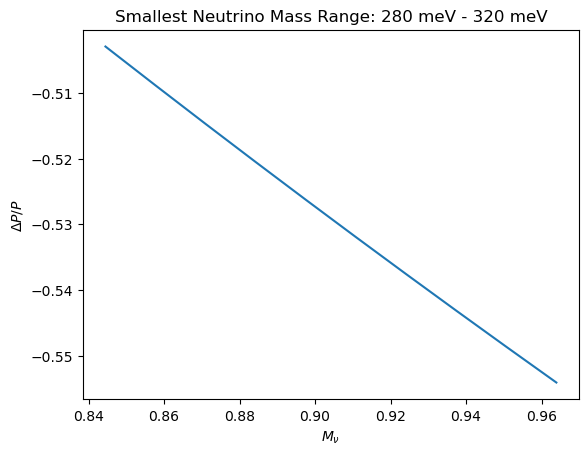

In [92]:
plt.figure()
plt.plot(mass_arr2, p_diff_arr2)
plt.xlabel('$M_ν$')
plt.ylabel(r'$\Delta P / P$')
plt.title('Smallest Neutrino Mass Range: 280 meV - 320 meV')